In [1]:
import torch
torch.set_default_dtype(torch.float64)
from datasets import SinusoidDataset
from models import MLPCNF
from lightning import Trainer
from lightning.pytorch.callbacks import RichModelSummary

In [2]:
dataset = SinusoidDataset()
model = MLPCNF(
    dim=len(dataset.parameter_names),
    obs_dim=len(dataset.observation_times),
    hidden_dim=512,
    depth=4,
    lr=1e-4,
)
# model = torch.compile(model)

train_dataloader = dataset.dataloader(
    batch_size=16*1024,
    batches=1024,
    num_workers=8,
    persistent_workers=True,
    pin_memory=True,
)
trainer = Trainer(
    devices='1,',
    max_epochs=20,
    callbacks=[RichModelSummary()],
)
trainer.fit(model, train_dataloader)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA RTX A6000') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


┏━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓
┃   ┃ Name ┃ Type ┃ Params ┃
┡━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩
│ 0 │ flow │ MLP  │  803 K │
└───┴──────┴──────┴────────┘

Trainable params: 803 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 803 K                                                                                                
Total estimated model params size (MB): 3

Training: |          | 0/? [00:00<?, ?it/s]

/home/davide_sartor/.conda/envs/torch_env/lib/python3.12/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


  0%|          | 0/5 [00:00<?, ?it/s]

Pushing data through flow
Running MCMC sampling



/home/davide_sartor/CANNA/priors.py:73: RuntimeWarning: invalid value encountered in log
  -np.log(x * np.log(self.high / self.low)),










100%|██████████| 300/300 [00:01<00:00, 278.79it/s]


Finished initial run, burn-in dropped and starting real run





















100%|██████████| 512/512 [00:01<00:00, 279.07it/s]


Pushing data through flow
Running MCMC sampling



/home/davide_sartor/CANNA/priors.py:73: RuntimeWarning: invalid value encountered in log
  -np.log(x * np.log(self.high / self.low)),










100%|██████████| 300/300 [00:01<00:00, 273.36it/s]


Finished initial run, burn-in dropped and starting real run





















100%|██████████| 512/512 [00:01<00:00, 275.03it/s]


Pushing data through flow
Running MCMC sampling



/home/davide_sartor/CANNA/priors.py:73: RuntimeWarning: invalid value encountered in log
  -np.log(x * np.log(self.high / self.low)),










100%|██████████| 300/300 [00:01<00:00, 273.53it/s]


Finished initial run, burn-in dropped and starting real run





















100%|██████████| 512/512 [00:01<00:00, 276.00it/s]


Pushing data through flow
Running MCMC sampling



/home/davide_sartor/CANNA/priors.py:73: RuntimeWarning: invalid value encountered in log
  -np.log(x * np.log(self.high / self.low)),










100%|██████████| 300/300 [00:01<00:00, 275.74it/s]


Finished initial run, burn-in dropped and starting real run





















100%|██████████| 512/512 [00:01<00:00, 275.33it/s]


Pushing data through flow
Running MCMC sampling




/home/davide_sartor/CANNA/priors.py:73: RuntimeWarning: invalid value encountered in log
  -np.log(x * np.log(self.high / self.low)),









100%|██████████| 300/300 [00:01<00:00, 271.17it/s]


Finished initial run, burn-in dropped and starting real run





















100%|██████████| 512/512 [00:01<00:00, 272.84it/s]


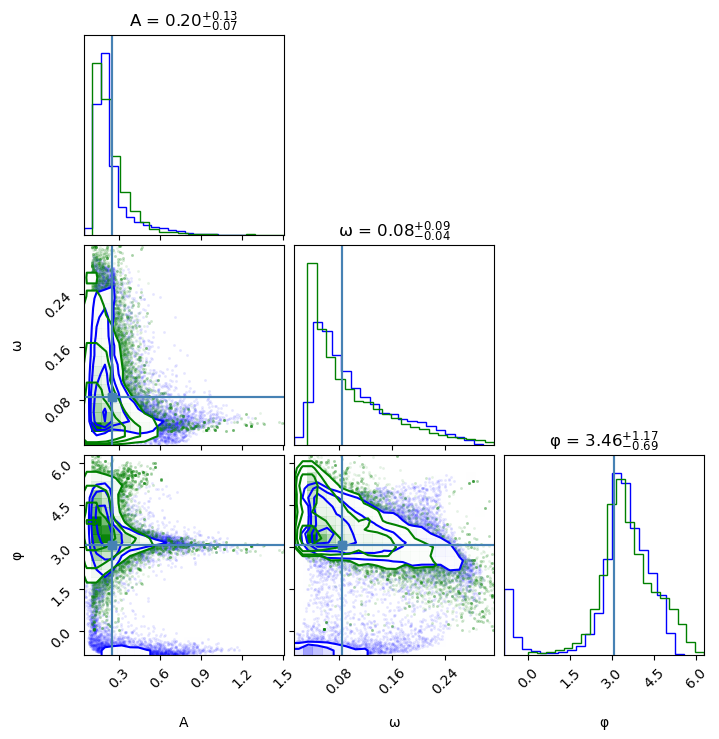

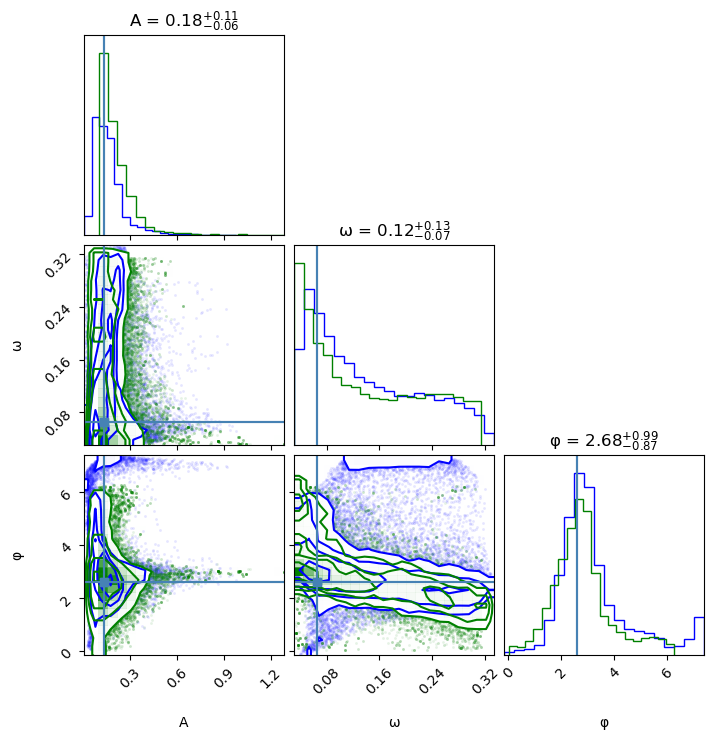

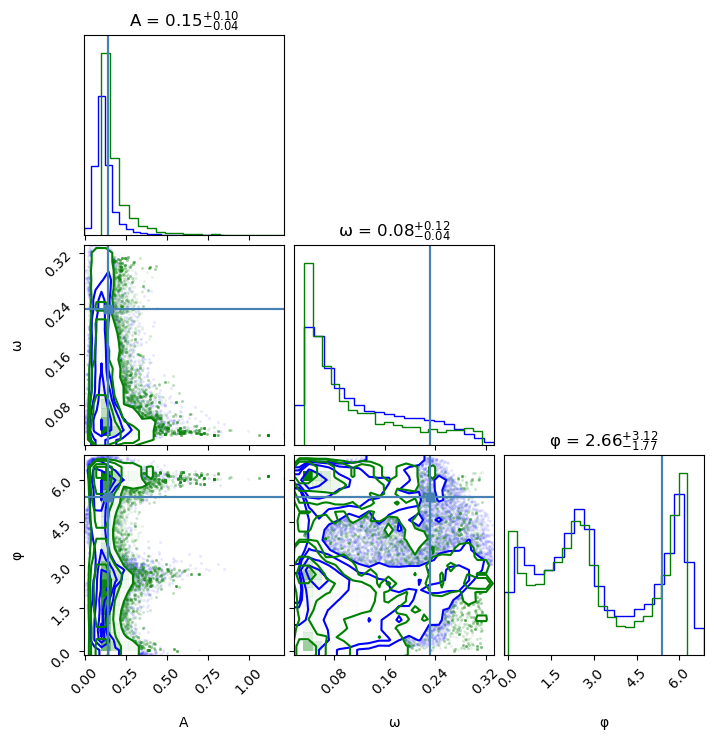

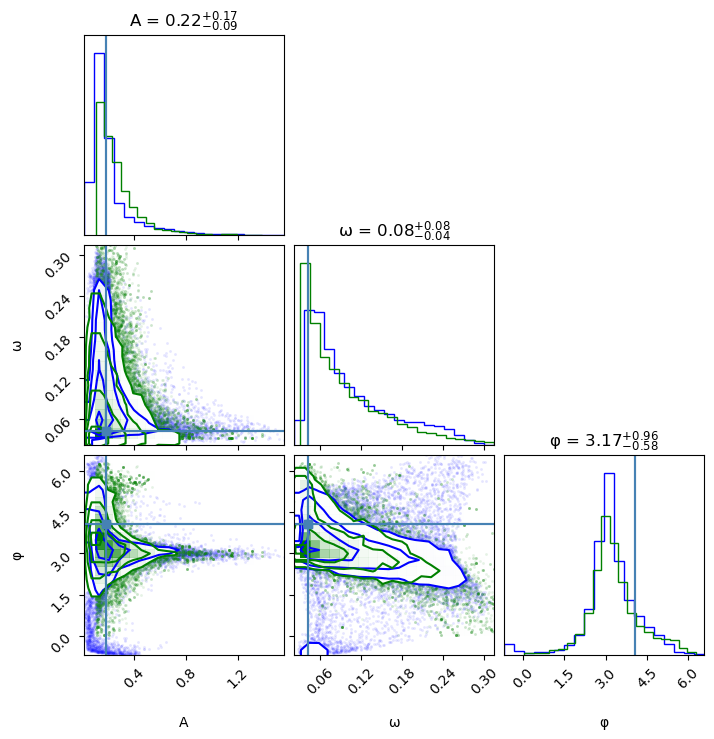

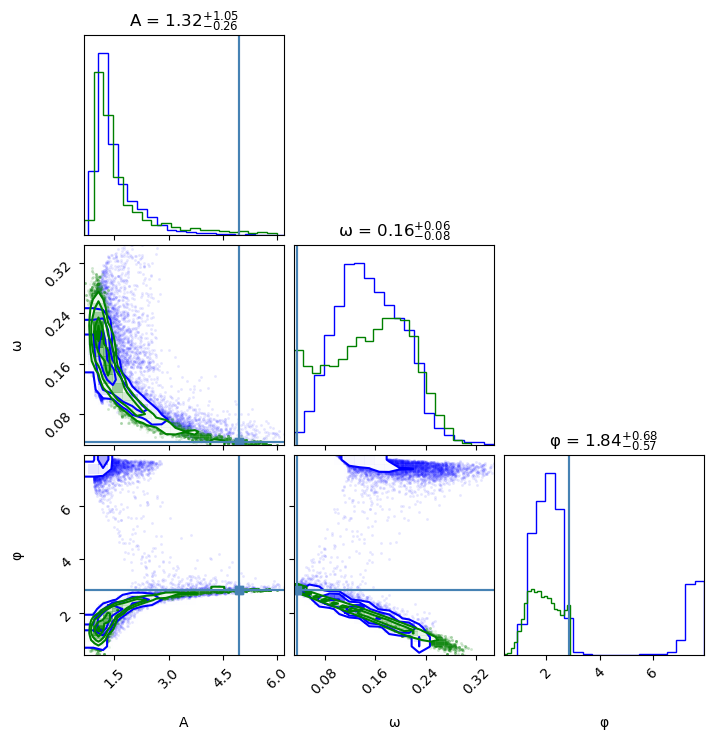

In [3]:
from utils import corner_plot
corner_plot(dataset, model.to("cuda"), examples=5, ode_steps=16, samples=32*1024, verbose=False)